In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from preprocessors import final_value

In [2]:
store_sizes = pd.read_csv("/research_data/sommer2020cadr/combined.csv")

In [3]:
# split data into different dataframes for each routing algorithm 
epidemic = store_sizes.loc[store_sizes["routing"] == "epidemic"]
context = store_sizes.loc[store_sizes["routing"] == "context"]
spray = store_sizes.loc[store_sizes["routing"] == "binary_spray"]
prophet = store_sizes.loc[store_sizes["routing"] == "prophet"]

# extract the final measurements
final_sizes_epidemic = final_value(epidemic)
final_sizes_context = final_value(context)
final_sizes_spray = final_value(spray)
final_sizes_prophet = final_value(prophet)

final_sizes_combined = pd.concat([final_sizes_epidemic, 
                                  final_sizes_context, 
                                  final_sizes_spray, 
                                  final_sizes_prophet])
final_sizes_combined

,Unnamed: 0,routing,node,timestamp,size,node_type
60,60,epidemic,n50,1583934609,277,sensor
105,44,epidemic,n46,1583933647,214,sensor
166,60,epidemic,n45,1583934608,276,sensor
227,60,epidemic,n44,1583934608,278,sensor
288,60,epidemic,n40,1583934608,98,sensor
...,...,...,...,...,...,...
10395,60,prophet,n45,1584111188,10,sensor
10456,60,prophet,n50,1584111188,11,sensor
10470,13,prophet,n6,1584108365,0,visitor
10531,60,prophet,n3,1584111187,0,visitor


In [4]:
# descriptive stats for epidemic run
final_sizes_epidemic["size"].describe()

count     50.000000
mean     202.320000
std      105.097708
min        0.000000
25%       95.000000
50%      276.000000
75%      278.000000
max      278.000000
Name: size, dtype: float64

In [5]:
# descriptive stats for context run
final_sizes_context["size"].describe()

count    50.000000
mean     18.240000
std      17.242046
min       1.000000
25%       4.250000
50%      10.000000
75%      31.000000
max      61.000000
Name: size, dtype: float64

In [6]:
# descriptive stats for binary_spray run
final_sizes_spray["size"].describe()

count    50.000000
mean     21.160000
std      11.245607
min       0.000000
25%      12.250000
50%      22.500000
75%      30.750000
max      46.000000
Name: size, dtype: float64

In [7]:
# descriptive stats for prophet run
final_sizes_prophet["size"].describe()

count    50.000000
mean      6.340000
std       5.336092
min       0.000000
25%       0.000000
50%       9.000000
75%      11.000000
max      14.000000
Name: size, dtype: float64

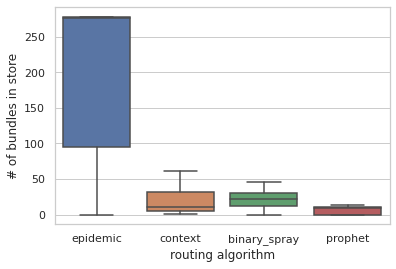

In [8]:
# plot store sizes of all simulation runs
sns.set(style="whitegrid")
bp = sns.boxplot(x="routing", y="size", data=final_sizes_combined)
bp.set(xlabel="routing algorithm", ylabel="# of bundles in store")
bp.figure.savefig("figures/size_boxplot_all.pdf", format="pdf")

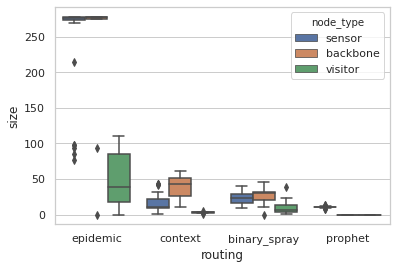

In [9]:
# plot store sizes of all simulation runs witch comparion between node types
sns.set(style="whitegrid")
bp = sns.boxplot(x="routing", y="size", hue="node_type", data=final_sizes_combined)

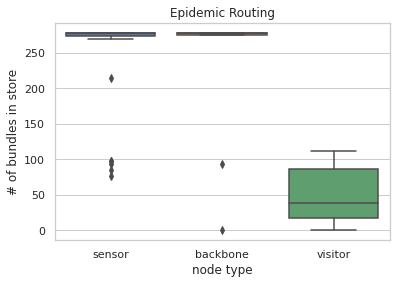

In [10]:
# plot store sizes of node types for epidemic
sns.set(style="whitegrid")
bp = sns.boxplot(x="node_type", y="size", data=final_sizes_epidemic)
bp.set(xlabel="node type", ylabel="# of bundles in store", title="Epidemic Routing")
bp.figure.savefig("figures/size_boxplot_epidemic.pdf", format="pdf")

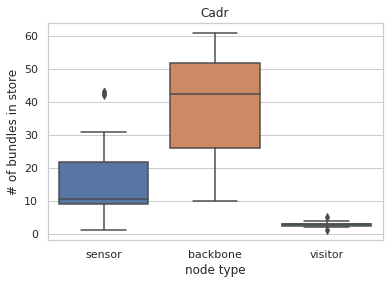

In [11]:
# plot store sizes of node types for context
sns.set(style="whitegrid")
bp = sns.boxplot(x="node_type", y="size", data=final_sizes_context)
bp.set(xlabel="node type", ylabel="# of bundles in store", title="Cadr")
bp.figure.savefig("figures/size_boxplot_context.pdf", format="pdf")

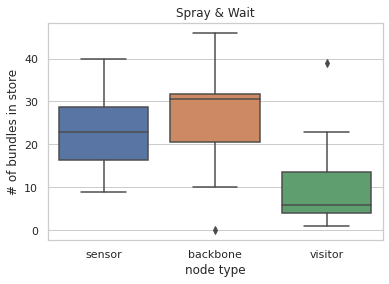

In [12]:
# plot store sizes of node types for binary_spray
sns.set(style="whitegrid")
bp = sns.boxplot(x="node_type", y="size", data=final_sizes_spray)
bp.set(xlabel="node type", ylabel="# of bundles in store", title="Spray & Wait")
bp.figure.savefig("figures/size_boxplot_spray.pdf", format="pdf")

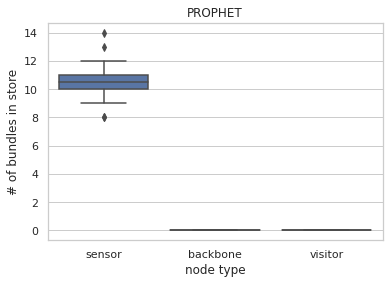

In [13]:
# plot store sizes of node types for prophet
sns.set(style="whitegrid")
bp = sns.boxplot(x="node_type", y="size", data=final_sizes_prophet)
bp.set(xlabel="node type", ylabel="# of bundles in store", title="PROPHET")
bp.figure.savefig("figures/size_boxplot_prophet.pdf", format="pdf")

In [14]:
bundle_runtimes_context = pd.read_csv("/research_data/sommer2020cadr/bundle_runtimes_context.csv")
bundle_runtimes_epidemic = pd.read_csv("/research_data/sommer2020cadr/bundle_runtimes_epidemic.csv")
bundle_runtimes_prophet = pd.read_csv("/research_data/sommer2020cadr/bundle_runtimes_prophet.csv")
bundle_runtimes_spray = pd.read_csv("/research_data/sommer2020cadr/bundle_runtimes_spray.csv")
bundle_runtimes_complete = pd.concat([
    bundle_runtimes_context,
    bundle_runtimes_epidemic,
    bundle_runtimes_prophet,
    bundle_runtimes_spray
])

[Text(0, 0.5, 'delivery time (ms)'), Text(0.5, 0, 'routing algorithm')]

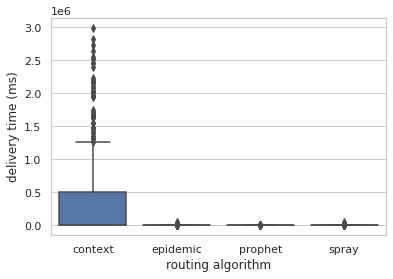

In [15]:
sns.set(style="whitegrid")
bp = sns.boxplot(x="routing", y="runtime", data=bundle_runtimes_complete)
bp.set(xlabel="routing algorithm", ylabel="delivery time (ms)")

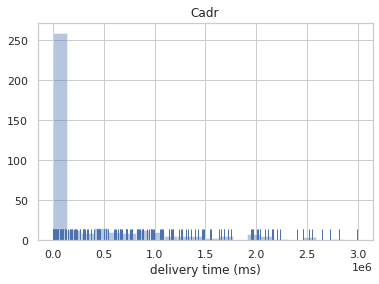

In [60]:
sns.set(style="whitegrid")
bp = sns.distplot(bundle_runtimes_context["runtime"], kde=False, rug=True)
bp.set(xlabel="delivery time (ms)", title="Cadr")
bp.figure.savefig("figures/delivery_time_cadr.pdf", format="pdf")

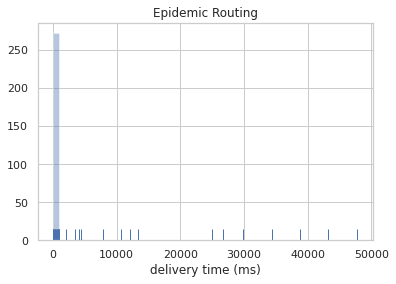

In [17]:
sns.set(style="whitegrid")
bp = sns.distplot(bundle_runtimes_epidemic["runtime"], kde=False, rug=True)
bp.set(xlabel="delivery time (ms)", title="Epidemic Routing")
bp.figure.savefig("figures/delivery_time_epidemic.pdf", format="pdf")

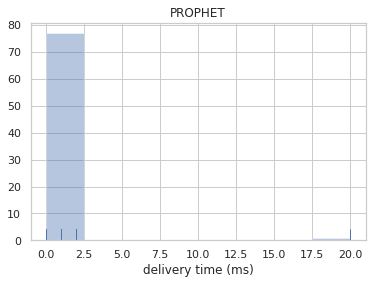

In [18]:
# When trying to plot this, a bunch of errors occur
sns.set(style="whitegrid")
bp = sns.distplot(bundle_runtimes_prophet["runtime"], kde=False, rug=True)
bp.set(xlabel="delivery time (ms)", title="PROPHET")
bp.figure.savefig("figures/delivery_time_prophet.pdf", format="pdf")

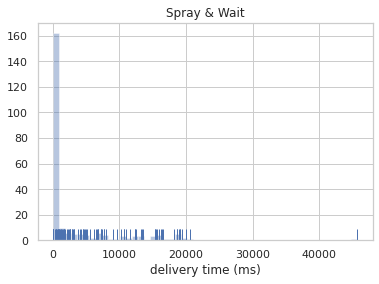

In [19]:
sns.set(style="whitegrid")
bp = sns.distplot(bundle_runtimes_spray["runtime"], kde=False, rug=True)
bp.set(xlabel="delivery time (ms)", title="Spray & Wait")
bp.figure.savefig("figures/delivery_time_spray.pdf", format="pdf")

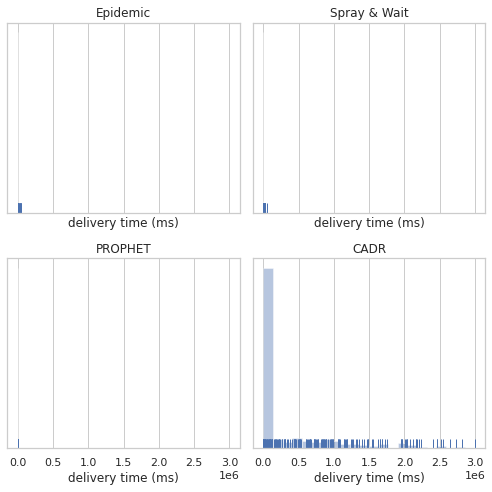

In [70]:
# now, this isn't particularly helpful...
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(bundle_runtimes_epidemic["runtime"], kde=False, rug=True, ax=axes[0, 0])
sns.distplot(bundle_runtimes_spray["runtime"], kde=False, rug=True, ax=axes[0, 1])
sns.distplot(bundle_runtimes_prophet["runtime"], kde=False, rug=True, ax=axes[1, 0])
sns.distplot(bundle_runtimes_context["runtime"], kde=False, rug=True, ax=axes[1, 1])
axes[0, 0].set_title("Epidemic")
axes[0, 1].set_title("Spray & Wait")
axes[1, 0].set_title("PROPHET")
axes[1, 1].set_title("CADR")
plt.setp(axes, yticks=[], xlabel="delivery time (ms)")
plt.tight_layout()

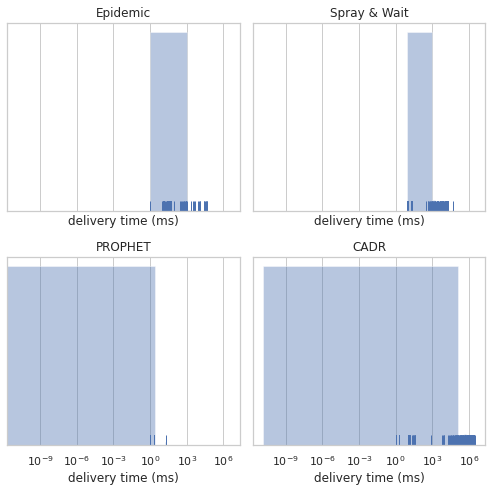

In [69]:
# and neither is this...
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(bundle_runtimes_epidemic["runtime"], kde=False, rug=True, ax=axes[0, 0])
sns.distplot(bundle_runtimes_spray["runtime"], kde=False, rug=True, ax=axes[0, 1])
sns.distplot(bundle_runtimes_prophet["runtime"], kde=False, rug=True, ax=axes[1, 0])
sns.distplot(bundle_runtimes_context["runtime"], kde=False, rug=True, ax=axes[1, 1])
axes[0, 0].set_title("Epidemic")
axes[0, 1].set_title("Spray & Wait")
axes[1, 0].set_title("PROPHET")
axes[1, 1].set_title("CADR")
plt.setp(axes, yticks=[], xscale="log", xlabel="delivery time (ms)")
plt.tight_layout()

In [20]:
bundle_runtimes_context["runtime"].describe()

count    3.890000e+02
mean     3.649657e+05
std      6.498610e+05
min      0.000000e+00
25%      1.000000e+00
50%      1.200000e+01
75%      5.047200e+05
max      2.995687e+06
Name: runtime, dtype: float64

In [21]:
bundle_runtimes_epidemic["runtime"].describe()

count      288.000000
mean      1097.743056
std       5688.025786
min          1.000000
25%         12.000000
50%         13.000000
75%         24.000000
max      47791.000000
Name: runtime, dtype: float64

In [22]:
bundle_runtimes_prophet["runtime"].describe()

count    78.000000
mean      1.371795
std       2.180843
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      20.000000
Name: runtime, dtype: float64

In [23]:
bundle_runtimes_spray["runtime"].describe()

count      235.000000
mean      2857.961702
std       5900.732196
min          8.000000
25%          9.000000
50%         18.000000
75%       2530.000000
max      45716.000000
Name: runtime, dtype: float64

In [24]:
missing_context = pd.read_csv("/research_data/sommer2020cadr/missing_bundles_context.csv")
missing_epidemic = pd.read_csv("/research_data/sommer2020cadr/missing_bundles_epidemic.csv")
missing_prophet = pd.read_csv("/research_data/sommer2020cadr/missing_bundles_prophet.csv")
missing_spray = pd.read_csv("/research_data/sommer2020cadr/missing_bundles_spray.csv")
total_bundes = pd.read_csv("/research_data/sommer2020cadr/bundles_filtered.csv")

In [25]:
delivery_ratio_context = 1.0 - (missing_context["bundle"].count()/total_bundes.loc[total_bundes["routing"]=="context"]["bundles"][0])
delivery_ratio_context

0.48263027295285355

In [26]:
delivery_ratio_context/final_sizes_context["size"].mean()

0.02645999303469592

In [27]:
delivery_ratio_epidemic = 1.0 - (missing_epidemic["bundle"].count()/total_bundes.loc[total_bundes["routing"]=="epidemic"]["bundles"][1])
delivery_ratio_epidemic

0.9381107491856677

In [28]:
delivery_ratio_epidemic/final_sizes_epidemic["size"].mean()

0.004636767245876175

In [29]:
delivery_ratio_prophet = 1.0 - (missing_prophet["bundle"].count()/total_bundes.loc[total_bundes["routing"]=="prophet"]["bundles"][2])
delivery_ratio_prophet

0.09341317365269464

In [30]:
delivery_ratio_prophet/final_sizes_prophet["size"].mean()

0.014733939061939217

In [31]:
delivery_ratio_spray = 1.0 - (missing_spray["bundle"].count()/total_bundes.loc[total_bundes["routing"]=="spray"]["bundles"][3])
delivery_ratio_spray

0.7389937106918238

In [32]:
delivery_ratio_spray/final_sizes_spray["size"].mean()

0.034924088406986006

In [33]:
bundle_processing_times = pd.read_csv("/research_data/sommer2020cadr/selection_compute.csv")
bundle_processing_times

,routing,node,type,time
0,epidemic,n48,sensor,2
1,epidemic,n48,sensor,3
2,epidemic,n48,sensor,3
3,epidemic,n48,sensor,2
4,epidemic,n48,sensor,2
...,...,...,...,...
401687,spray,n2,visitor,1
401688,spray,n2,visitor,1
401689,spray,n2,visitor,1
401690,spray,n2,visitor,1


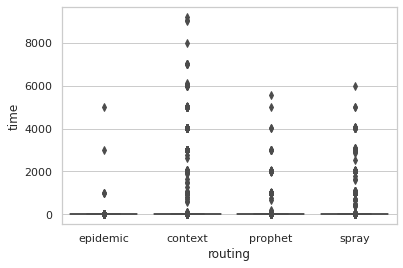

In [34]:
sns.set(style="whitegrid")
bp = sns.boxplot(x="routing", y="time", data=bundle_processing_times)
# well this isn't particularly helpful...

In [35]:
bundle_processing_times_epidemic = bundle_processing_times.loc[bundle_processing_times["routing"] == "epidemic"]
bundle_processing_times_epidemic["time"].describe()

count    41582.000000
mean         2.302390
std         29.840264
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max       5002.000000
Name: time, dtype: float64

In [36]:
bundle_processing_times_spray = bundle_processing_times.loc[bundle_processing_times["routing"] == "spray"]
bundle_processing_times_spray["time"].describe()

count    179867.000000
mean          5.477692
std          91.869402
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        6001.000000
Name: time, dtype: float64

In [37]:
bundle_processing_times_prophet = bundle_processing_times.loc[bundle_processing_times["routing"] == "prophet"]
bundle_processing_times_prophet["time"].describe()

count    59380.000000
mean         4.372785
std         73.714937
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5556.000000
Name: time, dtype: float64

In [38]:
bundle_processing_times_context = bundle_processing_times.loc[bundle_processing_times["routing"] == "context"]
bundle_processing_times_context["time"].describe()

count    120863.000000
mean         11.628066
std         172.063533
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max        9204.000000
Name: time, dtype: float64

In [39]:
bundle_processing_times_large = bundle_processing_times.loc[bundle_processing_times["time"] > 100]
bundle_processing_times_large

,routing,node,type,time
14480,epidemic,n27,sensor,1002
29316,epidemic,n47,sensor,5002
30381,epidemic,n49,sensor,3003
41474,epidemic,n3,visitor,1002
41576,epidemic,n3,visitor,1002
...,...,...,...,...
401656,spray,n2,visitor,2001
401662,spray,n2,visitor,3000
401668,spray,n2,visitor,4001
401674,spray,n2,visitor,1000


In [40]:
bundle_processing_times_epidemic_large = bundle_processing_times_large.loc[bundle_processing_times_large["routing"] == "epidemic"]
bundle_processing_times_epidemic_large["time"].describe()

count       5.000000
mean     2202.200000
std      1788.966238
min      1002.000000
25%      1002.000000
50%      1002.000000
75%      3003.000000
max      5002.000000
Name: time, dtype: float64

In [41]:
bundle_processing_times_spray_large = bundle_processing_times_large.loc[bundle_processing_times_large["routing"] == "spray"]
bundle_processing_times_spray_large["time"].describe()

count     570.000000
mean     1432.200000
std       788.756198
min       376.000000
25%      1000.000000
50%      1001.000000
75%      2000.000000
max      6001.000000
Name: time, dtype: float64

In [42]:
bundle_processing_times_prophet_large = bundle_processing_times_large.loc[bundle_processing_times_large["routing"] == "prophet"]
bundle_processing_times_prophet_large["time"].describe()

count     134.000000
mean     1332.910448
std       802.205376
min       138.000000
25%      1000.000000
50%      1001.000000
75%      1002.000000
max      5556.000000
Name: time, dtype: float64

In [44]:
bundle_processing_times_context_large = bundle_processing_times_large.loc[bundle_processing_times_large["routing"] == "context"]
bundle_processing_times_context_large["time"].describe()

count     546.000000
mean     2110.754579
std      1459.762228
min       587.000000
25%      1001.000000
50%      2001.000000
75%      3001.000000
max      9204.000000
Name: time, dtype: float64

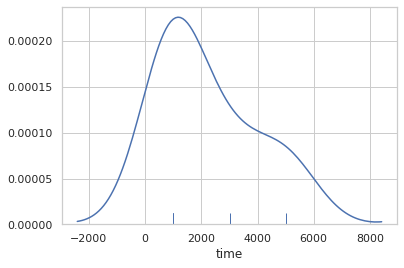

In [47]:
sns.distplot(bundle_processing_times_epidemic_large["time"], hist=False, rug=True)